In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [5]:
import yfinance as yf
import datetime

ticker = 'ICICIBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 2, 21)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,743.049988,766.000000,743.000000,764.700012,753.932556,9653095
2022-01-04,767.950012,778.000000,763.599976,772.849976,761.967834,12114437
2022-01-05,773.000000,795.849976,771.200012,788.049988,776.953796,19741360
2022-01-06,775.049988,792.500000,774.000000,785.049988,773.996033,13018067
2022-01-07,792.200012,802.299988,786.250000,793.250000,782.080566,12250210
...,...,...,...,...,...,...
2024-02-14,1009.549988,1035.699951,1007.549988,1022.700012,1022.700012,17878720
2024-02-15,1022.849976,1026.650024,1006.599976,1016.650024,1016.650024,10069878
2024-02-16,1023.200012,1026.199951,1016.900024,1023.250000,1023.250000,7159395


In [7]:
df.shape

(528, 6)

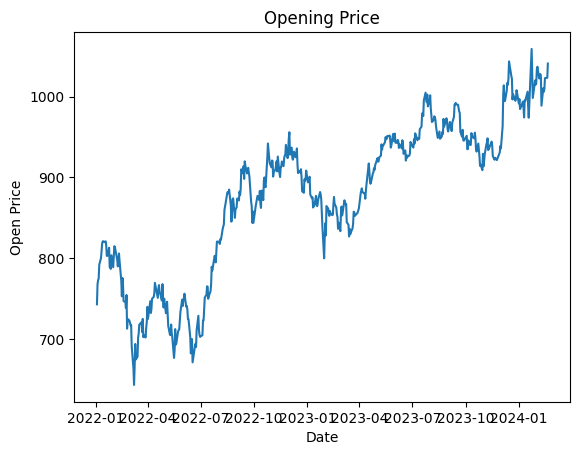

In [8]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

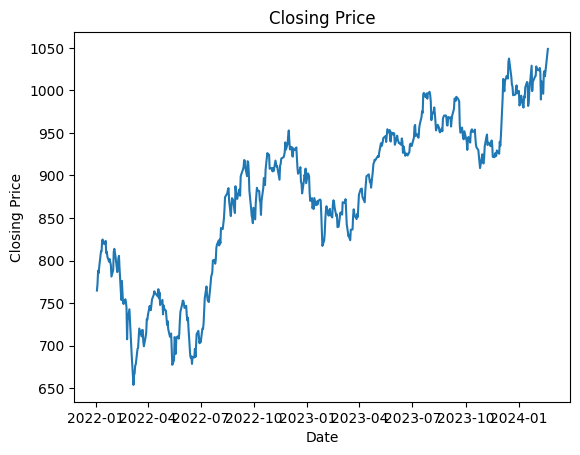

In [9]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

Text(0.5, 0, 'Year')

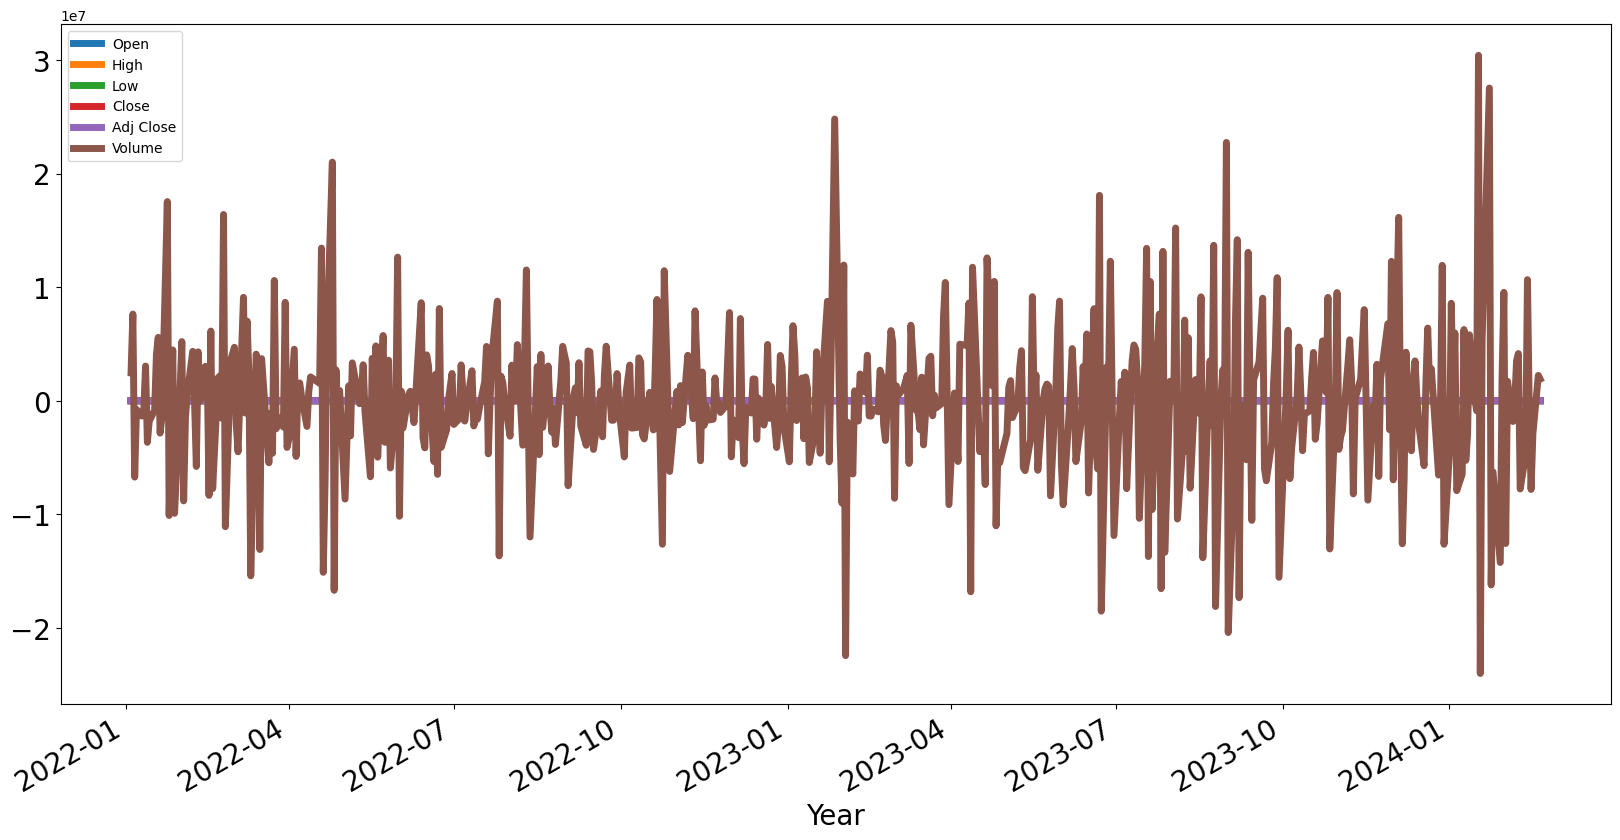

In [10]:
#First-order differencing
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 1.0, 'ICICIBANK Cumulative Returns')

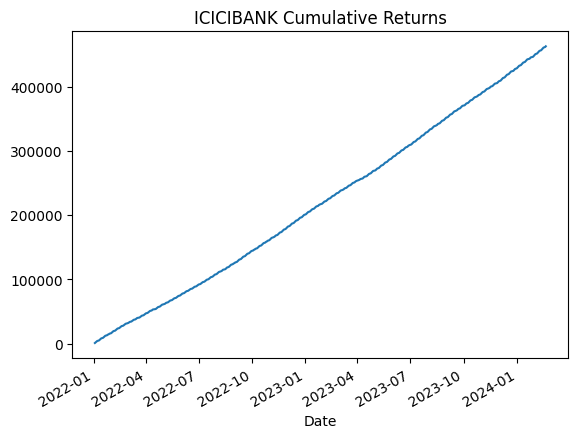

In [11]:
# Comulative Return
dr = df['Close'].cumsum()
dr.plot()
plt.title('ICICIBANK Cumulative Returns')

Text(0.5, 1.0, 'ICICIBANK Autocorrelation plot')

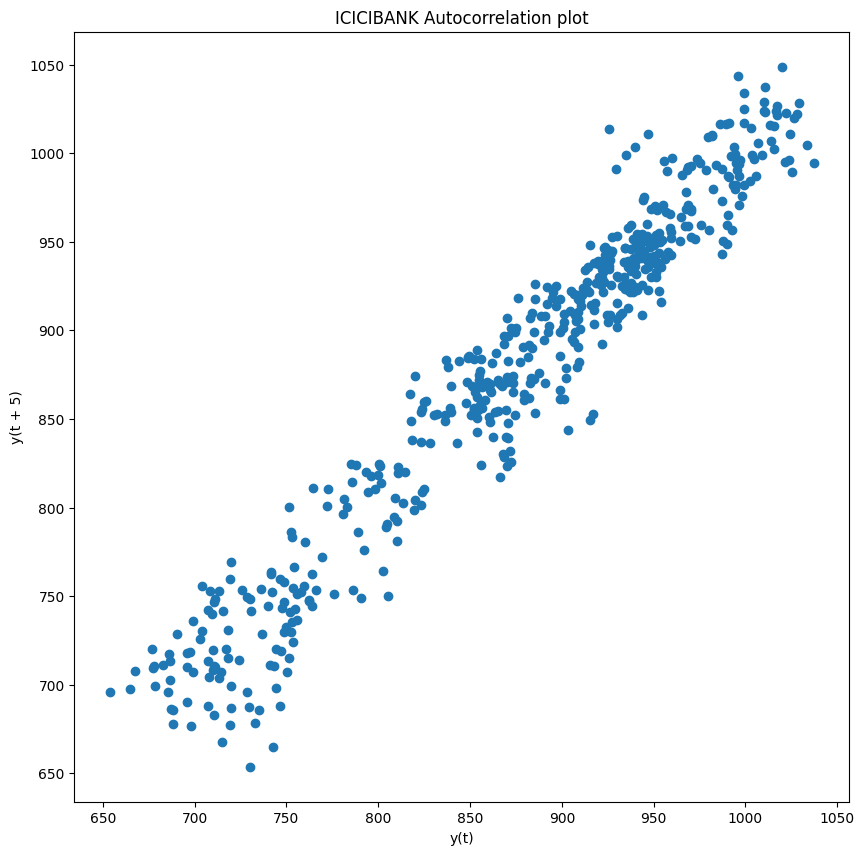

In [12]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('ICICIBANK Autocorrelation plot')

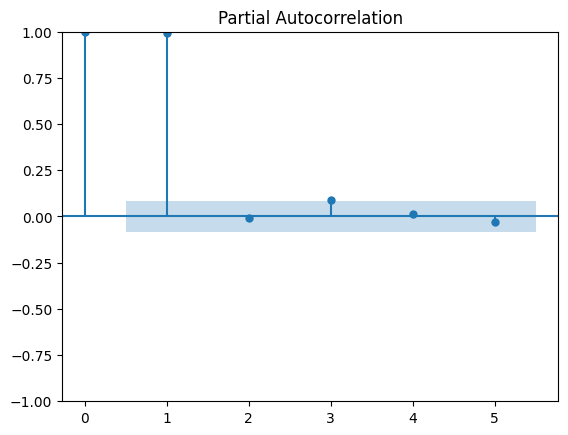

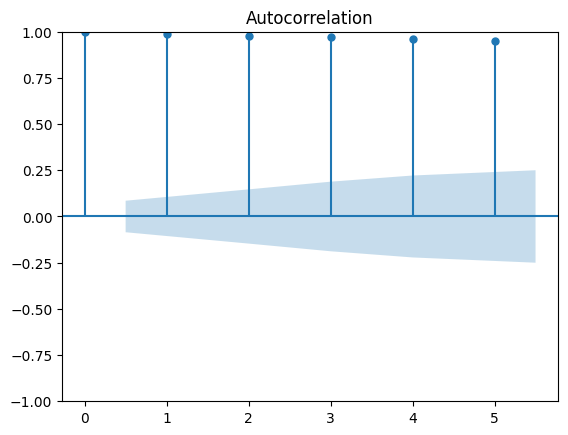

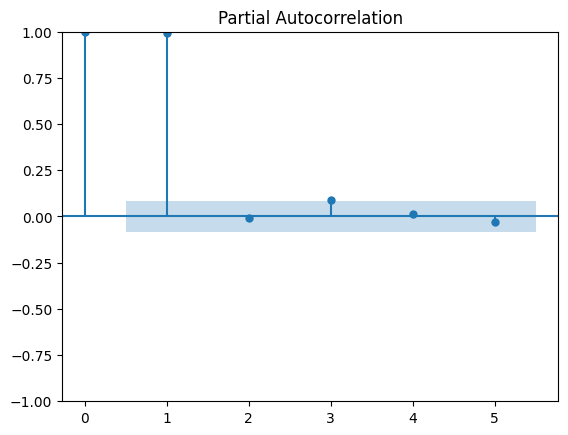

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'], lags=5)
plot_pacf(df['Close'], lags=5)

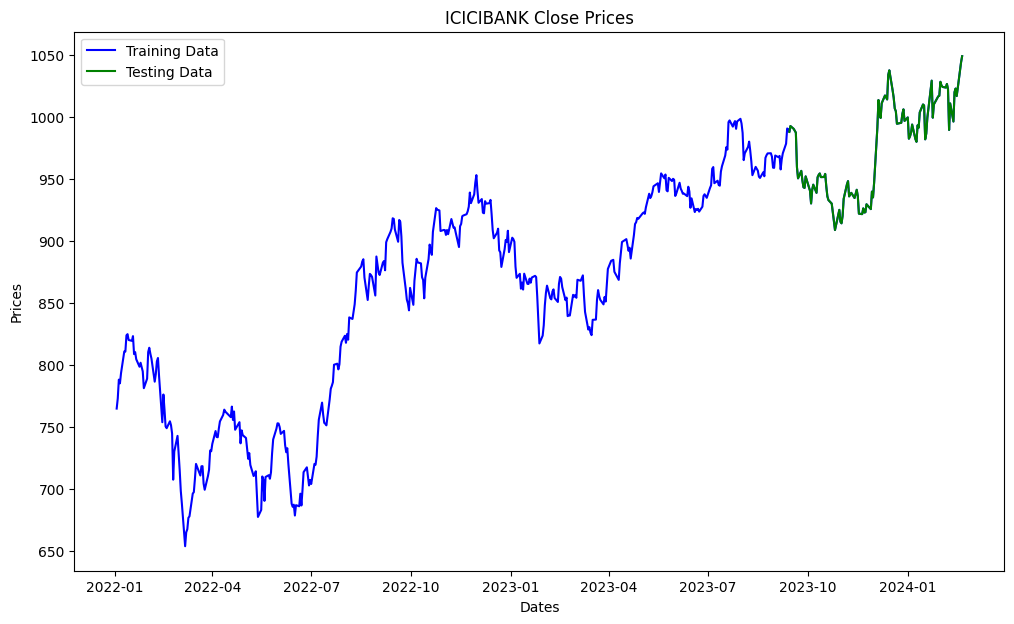

In [14]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ICICIBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [16]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
predictions = list()

# SARIMA order
order = (5, 2, 2)  # ARIMA order
seasonal_order = (1, 0, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

for t in range(len(test_ar)):
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False, method='powell', maxiter=1000)
    output = model_fit.get_forecast(steps=1)
    yhat = output.predicted_mean[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)



In [17]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAE: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 134.760
SMAE: 0.857
RMSE: 11.608605451326179
MAE: 8.394874611837421


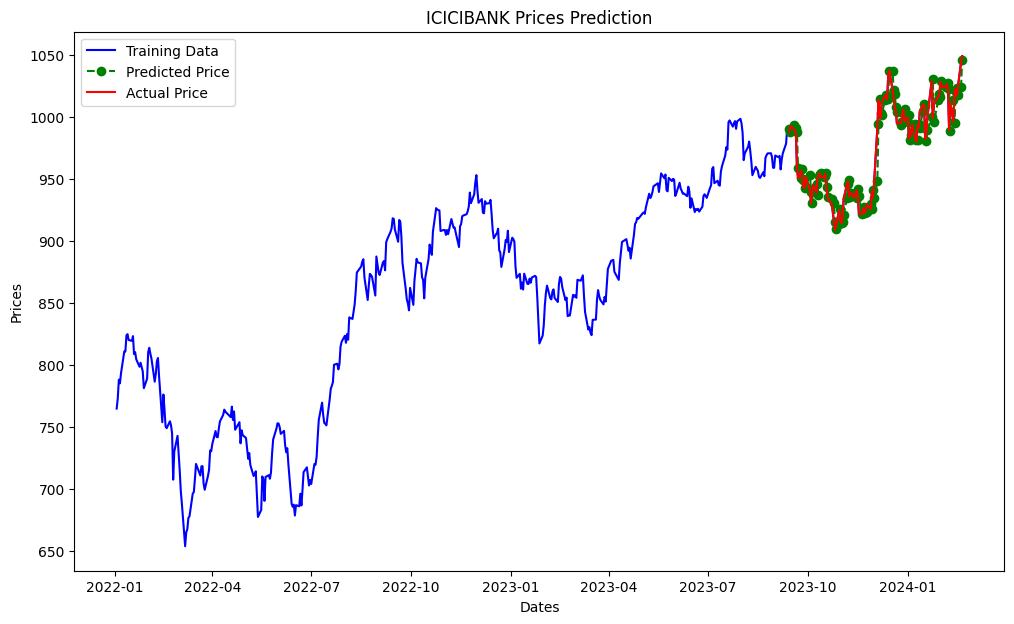

In [18]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

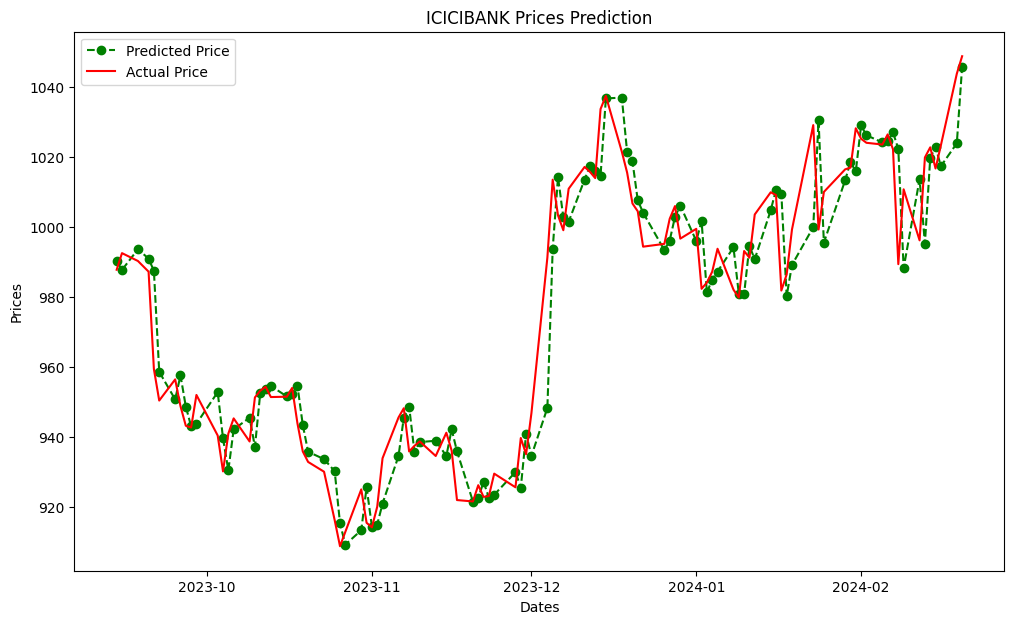

In [19]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('ICICIBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [20]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

       Actual   Predicted
0  987.700012  990.217247
1  992.450012  987.650354
2  990.200012  993.559735
3  987.150024  990.882153
4  959.299988  987.394920
5  950.299988  958.521536
6  956.349976  950.629901
7  948.700012  957.510970
8  943.099976  948.592518
9  942.599976  942.916630


<h1><b>STOCK VALUE PREDICTED FOR TOMORROW<b></h1>

In [22]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the SARIMA model
order = (5, 1, 2)  # ARIMA order
seasonal_order = (1, 0, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False, method='powell', maxiter=1000)

# Forecasting one step ahead (for tomorrow)
forecast = model_fit.get_forecast(steps=1)
predicted_value_tomorrow = forecast.predicted_mean[0]

print('Predicted Stock Value for Tomorrow:', predicted_value_tomorrow)


Predicted Stock Value for Tomorrow: 989.7711383688803


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [23]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the SARIMA model
order = (5, 1, 2)  # ARIMA order
seasonal_order = (1, 0, 1, 12)  # SARIMA seasonal order (adjust the seasonal component as needed)

model = SARIMAX(train_ar, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False, method='powell', maxiter=1000)

# Forecasting 60 days ahead
forecast = model_fit.get_forecast(steps=60)
predicted_values_60_days = forecast.predicted_mean

print('Predicted Stock Values for the Next 60 Days:', predicted_values_60_days)


Predicted Stock Values for the Next 60 Days: [989.77113837 989.8761872  990.17068654 990.80833819 990.79341701
 990.79345508 990.62871104 990.74332771 990.7843756  990.88145898
 991.04513592 991.03046011 991.0315631  991.05398201 991.06528787
 991.03627363 991.03662523 991.03317138 991.07383332 991.05013183
 991.04529357 991.02230449 990.98325266 990.98677569 990.98666312
 990.98154658 990.97887327 990.98573557 990.9856529  990.98647794
 990.97684816 990.98246641 990.98361243 990.98906132 990.99831776
 990.99748305 990.99750976 990.99872245 990.99935608 990.99772958
 990.99774919 990.99755363 990.9998361  990.99850445 990.99823282
 990.99694131 990.99474733 990.99494518 990.99493885 990.99465141
 990.99450122 990.99488674 990.9948821  990.99492845 990.99438745
 990.99470308 990.99476746 990.99507358 990.9955936  990.99554671]
